<a href="https://colab.research.google.com/github/KunalJain222/Binary-Search/blob/main/Binary_Search_on_2D_matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Binary Search On 2D Matrix**  
Binary Search in a 2D Matrix can be done 2 different ways depending on how the matrix is structured.

1st Approach:-  
-> The primary objective of the Binary Search algorithm is to efficiently determine the appropriate half to eliminate, thereby reducing the search space by half. It does this by determining a specific condition that ensures that the target is not present in that half.  
-> To make the time complexity even better, we won't use binary search on every row. We'll focus only on the particular row where the target might be located.


**How to check if a specific row is containing the target:**

-> If the target lies between the first and last element of the row, i (i.e. matrix[i][0] <= target && target <= matrix[i][m-1]), we can conclude that the target might be present in that specific row.

-> Once we locate the potentially relevant row containing the 'target', we need to confirm its presence. To accomplish this, we will utilize the Binary search algorithm, effectively reducing the time complexity.

**Algorithm:**
*   We will use a loop(say i) to select a particular row at a time.
*   Next, for every row, i, we will check if it contains the target.    
  *   If matrix[i][0] <= target && target <= matrix[i][m-1]: If this condition is met, we can conclude that row i has the possibility of containing the target.  
  So, we will apply binary search on row i, and check if the ‘target’ is present. If it is present, we will return true from this step.Otherwise, we will return false.

*  Otherwise, after completing the traversal, we will return false.  



code 👇

In [ ]:
def binary_search(nums, target):
    low = 0
    high = len(nums)-1

    while low <= high:
        mid = (low + high) // 2
        if nums[mid] == target:
            return mid
        elif target < nums[mid]:
            high = mid - 1
        else:
            low = mid + 1
    return False

def searchMatrix(matrix, target):
    n = len(matrix)
    m = len(matrix[0])

    for i in range(n):
        if matrix[i][0] <= target <= matrix[i][m-1]:
            return binary_search(matrix[i], target)
    return False

matrix = [[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]]
result = searchMatrix(matrix, 8)
print("true" if result else "false")


**Time Complexity:**  
Time Complexity: O(N + logM), where N = given row number, M = given column number.  
Reason: We are traversing all rows and it takes O(N) time complexity. But for all rows, we are not applying binary search rather we are only applying it once for a particular row. That is why the time complexity is O(N + logM) instead of O(N*logM).

**2nd Approach(Optimal Approach):**  
If we flatten the given 2D matrix to a 1D array, the 1D array will also be sorted. By utilizing binary search on this sorted 1D array to locate the 'target' element, we can further decrease the time complexity. The flattening will be like the following:  
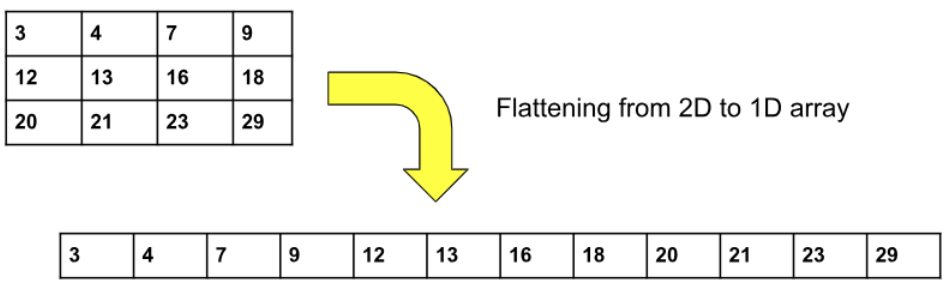

**How to apply binary search on the 1D array without actually flattening the 2D matrix:**  
-> If we can figure out how to convert the index of the 1D array into the corresponding cell number in the 2D matrix, our task will be complete.   
-> In this scenario, we will use the binary search with the indices of the imaginary 1D array, ranging from 0 to (NxM)-1(total no. of elements in the 1D array = NxM).   
-> When comparing elements, we will convert the index to the cell number and retrieve the element. Thus we can apply binary search in the imaginary 1D array.

**How to convert 1D array index to the corresponding cell of the 2D matrix:**  
We will use the following formula:  
If index = i, and no. of columns in the matrix = m, the index i corresponds to the cell with
row = i / m and col = i % m. More formally, the cell is (i / m, i % m)(0-based indexing).  
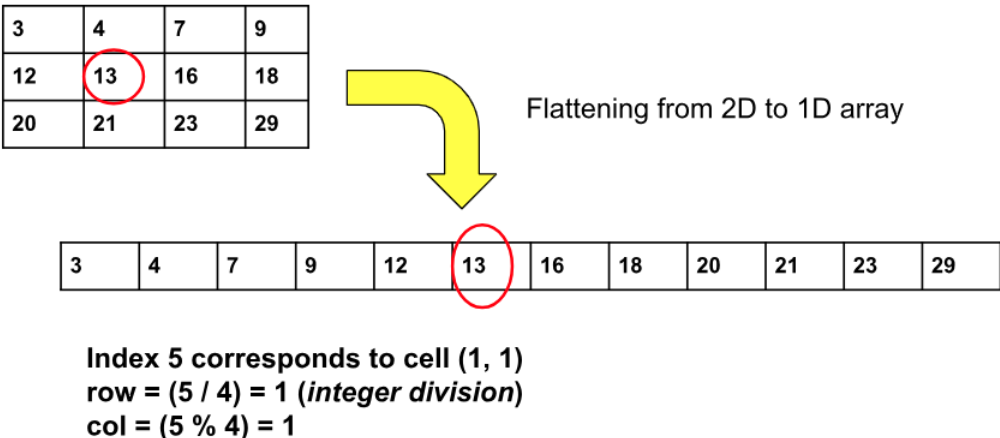

**Algorithm:**


*   LPlace the 2 pointers i.e. low and high: Initially, we will place the pointers. The pointer low will point to 0 and the high will point to (NxM)-1.
*   Calculate the ‘mid’: Now, inside the loop, we will calculate the value of ‘mid’ using the following formula:
mid = (low+high) // 2 ( ‘//’ refers to integer division)


*   Eliminate the halves based on the element at index mid: To get the element, we will convert index ‘mid’ to the corresponding cell using the above formula. Here no. of columns of the matrix = M.
row = mid / M, col = mid % M.  

 *   If matrix[row][col] == target: We should return true here, as we have found the ‘target’.
 *   If matrix[row][col] < target: In this case, we need bigger elements. So, we will eliminate the left half and consider the right half (low = mid+1).
 *   If matrix[row][col] > target: In this case, we need smaller elements. So, we will eliminate the right half and consider the left half (high = mid-1).


*   Steps 2-3 will be inside a while loop and the loop will end once low crosses high  
(i.e. low > high). If we are out of the loop, we can say the target does not exist in the matrix. So, we will return false.








code 👇

In [ ]:
def searchMatrix(matrix, target):
    n = len(matrix)
    m = len(matrix[0])

    # apply binary search:
    low = 0
    high = n * m - 1
    while low <= high:
        mid = (low + high) // 2
        row = mid // m
        col = mid % m
        if matrix[row][col] == target:
            return True
        elif matrix[row][col] < target:
            low = mid + 1
        else:
            high = mid - 1
    return False

matrix = [[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]]
result = searchMatrix(matrix, 8)
print("true" if result else "false")

**Time Complexity**:  
Time Complexity: O(log(NxM)), where N = given row number, M = given column number.